# Non sleep deprivation analysis

In [228]:
### Alternatively, load from file. copy paste this under the imports
from pathlib import Path
from neuropy.core.session import ProcessData
from neuropy.core.neurons import Neurons
import numpy as np
data_dir = Path('/home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD')
sess = ProcessData(data_dir)
paradigm = np.load(sess.filePrefix.with_suffix('.paradigm.npy'),allow_pickle=True).item()
neurons = Neurons.from_dict(np.load(sess.filePrefix.with_suffix('.neurons.stable.npy'),allow_pickle=True).item())
start=paradigm['epochs']['start'][2]
stop=paradigm['epochs']['stop'][2]

In [ ]:
%load_ext autoreload
%autoreload 2
from neuropy.analyses import correlations 
import numpy as np
import neuropy.analyses.ms_connectivity as msconn
import seaborn as sns
import matplotlib.pyplot as plt
import time
# get only sleep sessions
#### from sd_figure1_bs.ipynb
import subjects
bin_size = 0.001 # 1 ms
window_size = 0.02 # 20 ms
# get POST
# for i in range(len(subjects.nsd.allsess)):
#     print(subjects.nsd.allsess[i].paradigm)
subjects.data_table(subjects.nsd.allsess)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,session,paradigm,artifact,brainstates,spindle,ripple,theta,pbe,neurons,position,maze.linear,re-maze.linear,maze1.linear,maze2.linear
0,RatJ_Day2_2019-06-02_03-59-19,True,True,True,False,True,False,True,True,False,False,False,False,False
1,RatK_Day2_2019-08-08_04-00-00,True,True,True,False,True,False,True,True,True,True,False,False,False
2,RatN_Day2_2019-10-11_03-58-54,True,False,True,False,True,False,False,True,False,False,False,False,False
3,RatS-Day2NSD-2020-11-27_10-22-29,True,True,True,False,True,False,True,True,True,True,False,False,False
4,RatR_Day1NSD_2021-05-13_08-41-31,True,True,True,False,True,False,True,True,False,False,False,False,False
5,RatU_Day2NSD_2021-07-24_08-16-38,True,True,True,True,True,False,True,True,True,True,False,False,False
6,RatV_Day1NSD_2021-10-02_08-10-23,True,True,True,False,True,False,True,True,True,True,False,False,False
7,RatV_Day3NSD_2021-10-07_08-10-12,True,True,True,False,True,False,True,True,True,True,False,False,False


In [ ]:
def plot_ccg(ccgs, window_size, bin_size, inds, pvals=None,pred=None,mode='even'):
    # example result - submillisecond synchrony
    window_size*=1e3
    bin_size*=1e3
    _, ax = plt.subplots()
    x,y=inds
    # generating even-numbered bins
    if mode=='even':
        bins = np.arange(-window_size / 2-bin_size, window_size / 2+bin_size/2, bin_size)+bin_size/2
    else:
        bins = np.arange(-window_size / 2, window_size / 2+bin_size, bin_size)
    ax.bar(bins, ccgs[x,y], width=bin_size,alpha=0.5,label="ccg")
    if pred is not None: ax.bar(bins, pred[x,y], width=bin_size,alpha=0.5,label='ccg-smooth')
    if pvals is not None: ax.plot(bins, pvals[x,y]*np.max(ccgs[x,y]), label='p')
    ax.set_xlabel("Time (millisecond)")
    ax.set_ylabel("Count")
    ax.set_title(f"CCG, neuron_inds=[{x},{y}]")
    ax.legend()
    sns.despine(ax=ax)


In [541]:
# get indices of pyr and ints
# calculate ccg between some pairs of them
# calculate strength of ccg
# TODO is there a data struture that stores connectivities

In [ ]:
print("data sampling rate\t", sess.recinfo.dat_sampling_rate)
print("eeg sampling rate\t", sess.recinfo.eeg_sampling_rate)
print("n_channels\t\t", sess.recinfo.n_channels)
print("signal dtype\t\t", sess.recinfo.sig_dtype)
print("skipped channels\t", sess.recinfo.skipped_channels)
print("discarded channels\t", sess.recinfo.discarded_channels)
print("source file\t\t", sess.recinfo.source_file)
# print(sess.recinfo.to_dict())
print("basepath\t\t", sess.basepath)
print("file prefix\t\t", sess.filePrefix)
print("probegroup\t\t", sess.probegroup)
print("channel groups\t\t",sess.recinfo.channel_groups)

data sampling rate	 30000
eeg sampling rate	 1250
n_channels		 192
signal dtype		 16
skipped channels	 [ 17 140 163]
discarded channels	 []
source file		 /home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD/RatU_Day2NSD_2021-07-24_08-16-38.xml
basepath		 /home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD
file prefix		 /home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD/RatU_Day2NSD_2021-07-24_08-16-38
probegroup		 <neuropy.core.probe.ProbeGroup object at 0x7f1fdd8e2ed0>
channel groups		 [[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
 [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
 [96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 

### Population statistics


In [133]:
subjects.nsd.allsess

[ProcessData(RatJ_Day2_2019-06-02_03-59-19.xml),
 ProcessData(RatK_Day2_2019-08-08_04-00-00.xml),
 ProcessData(RatN_Day2_2019-10-11_03-58-54.xml),
 ProcessData(RatS-Day2NSD-2020-11-27_10-22-29.xml),
 ProcessData(RatR_Day1NSD_2021-05-13_08-41-31.xml),
 ProcessData(RatU_Day2NSD_2021-07-24_08-16-38.xml),
 ProcessData(RatV_Day1NSD_2021-10-02_08-10-23.xml),
 ProcessData(RatV_Day3NSD_2021-10-07_08-10-12.xml)]

In [551]:
msconn.routine_mean_firing_rates(subjects.nsd.allsess,
                        epochs = ["pre","post"], 
                        n_chunks = [1,3], 
                        brainstates=["REM","NREM"])

Mean firing rates P VALUES
=======RatJ_Day2=======
1. Pyramidal neurons	n=17	mean firing rates (Hz)|effective time (h)
nan|0.00  0.36|2.18  0.44|2.11  0.18|2.28  
No significant difference between chunks
2. Interneurons		n=0	mean firing rates (Hz)|effective time (h)
0.00|0.00  0.00|2.18  0.00|2.11  0.00|2.28  
Too few neurons in this category



/home/selinali/Documents/NeuroPy/neuropy/core/neurons.py:430: RuntimeWarning: invalid value encountered in divide
  return self.n_spikes / self.effective_time
/home/selinali/Documents/NeuroPy/neuropy/core/neurons.py:430: RuntimeWarning: invalid value encountered in divide
  return self.n_spikes / self.effective_time


=======RatK_Day2=======
1. Pyramidal neurons	n=34	mean firing rates (Hz)|effective time (h)
nan|0.00  0.77|0.15  0.83|2.57  0.82|2.63  
No significant difference between chunks
2. Interneurons		n=3	mean firing rates (Hz)|effective time (h)
nan|0.00  5.68|0.15  8.26|2.57  11.57|2.63  
No significant difference between chunks

=======RatN_Day2=======
1. Pyramidal neurons	n=117	mean firing rates (Hz)|effective time (h)
0.69|0.12  0.79|1.86  0.77|1.39  0.78|2.64  
No significant difference between chunks
2. Interneurons		n=17	mean firing rates (Hz)|effective time (h)
14.59|0.12  16.42|1.86  16.42|1.39  15.52|2.64  
No significant difference between chunks

=======RatS-Day2NSD-2020-11-27_10-22-29=======
1. Pyramidal neurons	n=97	mean firing rates (Hz)|effective time (h)
0.66|0.04  0.55|1.56  0.56|1.78  0.51|1.84  
No significant difference between chunks
2. Interneurons		n=9	mean firing rates (Hz)|effective time (h)
18.28|0.04  17.77|1.56  17.97|1.78  17.51|1.84  
No significant difference 

/home/selinali/Documents/NeuroPy/neuropy/core/neurons.py:430: RuntimeWarning: invalid value encountered in divide
  return self.n_spikes / self.effective_time


=======RatR_Day1NSD=======
1. Pyramidal neurons	n=48	mean firing rates (Hz)|effective time (h)
nan|0.00  0.68|0.58  0.43|1.43  0.47|1.14  
No significant difference between chunks
2. Interneurons		n=5	mean firing rates (Hz)|effective time (h)
nan|0.00  12.80|0.58  7.45|1.43  7.97|1.14  
No significant difference between chunks



/home/selinali/Documents/NeuroPy/neuropy/core/neurons.py:430: RuntimeWarning: invalid value encountered in divide
  return self.n_spikes / self.effective_time


=======RatU_Day2NSD=======
1. Pyramidal neurons	n=174	mean firing rates (Hz)|effective time (h)
nan|0.00  0.59|2.00  0.61|1.85  0.63|1.44  
No significant difference between chunks
2. Interneurons		n=14	mean firing rates (Hz)|effective time (h)
nan|0.00  19.42|2.00  20.81|1.85  21.14|1.44  
No significant difference between chunks

=======RatV_Day1NSD=======
1. Pyramidal neurons	n=76	mean firing rates (Hz)|effective time (h)
0.72|0.18  0.64|1.83  0.59|1.90  0.52|2.05  
No significant difference between chunks
2. Interneurons		n=6	mean firing rates (Hz)|effective time (h)
17.49|0.18  12.37|1.83  10.22|1.90  6.34|2.05  
Pre1 VS SLEEPPost2	p=0.0262
Pre1 VS SLEEPPost3	p=0.0020

=======RatV_Day3NSD=======
1. Pyramidal neurons	n=78	mean firing rates (Hz)|effective time (h)
0.86|0.75  0.79|1.57  0.63|2.41  0.46|1.72  
Pre1 VS SLEEPPost3	p=0.0106
Post1 VS SLEEPPost3	p=0.0115
2. Interneurons		n=6	mean firing rates (Hz)|effective time (h)
4.43|0.75  4.88|1.57  6.03|2.41  6.19|1.72  
No significa

([[0.7475155904559291],
  [1.568504335896402, 2.4094325676571295, 1.7177374430493526]],
 [[4.427443889584608],
  [4.882629745201901, 6.033193984843106, 6.193925084470172]],
 [[4.25213588638655],
  [4.098354759457634, 4.239178625753113, 4.481457559292076]],
 [[5.169903320646762],
  [4.819656920780794, 7.319381248633123, 7.772093878891532]],
 [array([ 0.13006046,  6.95860626, 12.34942656,  3.44771702,  3.64169291,
          0.03716013]),
  array([ 0.20171375,  4.87424714, 12.28700602,  6.76121816,  0.35384027,
          4.81775313]),
  array([ 0.18399906,  6.78029628, 10.1043846 , 10.99982365,  0.59649821,
          7.53416211]),
  array([ 1.83882067,  5.09002896, 11.95775167, 12.01354211,  0.44179563,
          5.82161147])])

In [557]:
x=msconn.routine_eranconv_pairs(subjects.nsd.allsess[1:],tight_bounds=True,brainstates=['NREM']) # stable

EranConv significant pairs
=======RatK_Day2=======
Each chunk is 0.09 hours  pyr=34 inter=3 
SLEEP0: E/I pairs 000 / 000 | no connections
SLEEP1: E/I pairs 033 / 059 | pyr-pyr/E 08 | pyr-int/E 02 | int-int/I - | int-pyr/I 01 | 
SLEEP2: E/I pairs 033 / 055 | pyr-pyr/E 13 | pyr-int/E 03 | int-int/I - | int-pyr/I 01 | 

=======RatN_Day2=======
Each chunk is 1.55 hours  pyr=117 inter=17 
SLEEP0: E/I pairs 147 / 271 | pyr-pyr/E 36 | pyr-int/E 19 | int-int/I 03 | int-pyr/I 24 | 
SLEEP1: E/I pairs 126 / 202 | pyr-pyr/E 28 | pyr-int/E 13 | int-int/I - | int-pyr/I 22 | 
SLEEP2: E/I pairs 196 / 321 | pyr-pyr/E 34 | pyr-int/E 21 | int-int/I 02 | int-pyr/I 30 | 

=======RatS-Day2NSD-2020-11-27_10-22-29=======
Each chunk is 1.34 hours  pyr=97 inter=9 
SLEEP0: E/I pairs 026 / 175 | pyr-pyr/E 03 | pyr-int/E - | int-int/I - | int-pyr/I 01 | 
SLEEP1: E/I pairs 025 / 167 | pyr-pyr/E 04 | pyr-int/E - | no inhbitory connections  
SLEEP2: E/I pairs 025 / 144 | pyr-pyr/E 01 | pyr-int/E - | int-int/I - | int

In [692]:
x=msconn.routine_eranconv_pairs(subjects.nsd.allsess[5],tight_bounds=True,brainstates=['REM','NREM'],n_chunks=1,return_neurons=True)

EranConv significant pairs
=======RatU_Day2NSD=======
Each chunk is 5.29 hours  pyr=174 inter=14 
SLEEP0: E/I pairs 223 / 328 | pyr-pyr/E 45 | pyr-int/E 01 | no inhbitory connections  



In [ ]:
k=x['RatU_Day2NSD']['E']['pyr','pyr'][0]
coords=k['ids']
s=np.argsort(coords[:,1])
coords=coords[s]
ccg=k['ccg'][s]
pvals=k['pval'][s]
pred=k['pred'][s]
frates = k['neurons']['frates']
uniqids = k['neurons']['ids']
neurons = x['RatU_Day2NSD']['neurons']
keys, inv = np.unique(coords[:,1], return_inverse=True)
jitter_inputs = [coords[inv==i,0].tolist()+[k] for i,k in enumerate(keys)]


In [778]:
# group by target neuron, return list of inputs properly formatted for add_jitter()
jitter_significances=[]
for inds in jitter_inputs:
    jitter_significances.append(msconn.ccg_jitter(neurons,inds,use_cupy=True,njitter=10,symmetrize_mode='odd')[2])

shift 9
shift 10
shift 10
shift 8
shift 7
shift 10
shift 4
shift 6
shift 8
shift 6
shift 6


In [779]:
jitter_significances = np.array([[v, g[-1]] for g in jitter_significances for v in g[:-1]])

In [ ]:
jitter_significances.

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

ValueError: x and y must have same first dimension, but have shapes (21,) and (34, 2, 21)

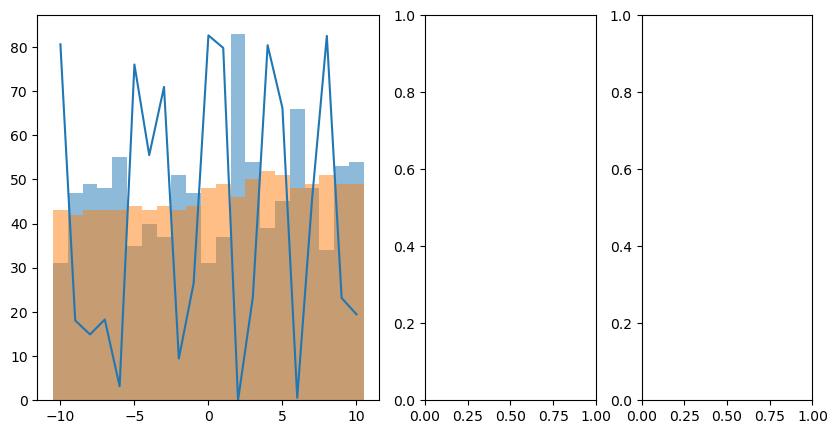

In [783]:
cds=coords#[np.random.random_integers(0,coords.shape[0]-1,5)]
def plot_ccg_eranconv(ccgs, window_size, bin_size, inds, pvals, pred, jitter_sigs, uniqids, frates, mode='even'):
    # example result - submillisecond synchrony
    window_size*=1e3
    bin_size*=1e3
    for (x,y),ccg, prd,pval in zip(inds, ccgs, pred, pvals):
        fig, axs = plt.subplots(1,3,figsize=(10,5),gridspec_kw={'width_ratios':[2,1,1]})
        # generating even-numbered bins
        if mode=='even':
            bins = np.arange(-window_size / 2-bin_size, window_size / 2+bin_size/2, bin_size)+bin_size/2
        else:
            bins = np.arange(-window_size / 2, window_size / 2+bin_size, bin_size)
        ax=axs[0]
        ax.bar(bins, ccg, width=bin_size,alpha=0.5,label="ccg")
        ax.bar(bins, prd, width=bin_size,alpha=0.5,label='ccg-smooth')
        ax.plot(bins, pval*np.max(ccg), label='p')
        ax.plot(bins, jitter_sigs*np.max(ccg),label='j-significance')
        ax.set_xlabel("Time (millisecond)")
        ax.set_ylabel("Count")
        ax.set_title(f"CCG, neuron_inds=[{x},{y}]")
        ax.legend()
        sns.despine(ax=ax)
        xx,yy=np.where(uniqids==x)[0][0],np.where(uniqids==y)[0][0]
        ax=axs[1]
        ax.imshow(neurons.waveforms[x].astype(float))
        ax.set_title(f"ref: {neurons.neuron_type[x]}{x}")
        ax.set_xlabel(f"{neurons.firing_rate[x]:.2f}Hz all | {frates[xx]:.2f}Hz sleep")
        ax=axs[2]
        ax.imshow(neurons.waveforms[y].astype(float))
        ax.set_title(f"target: {neurons.neuron_type[y]}{y}")
        ax.set_xlabel(f"{neurons.firing_rate[y]:.2f}Hz all | {frates[yy]:.2f}Hz sleep")
        fig.savefig(f"/home/selinali/Documents/NeuroPy/images/ccg_plots/ccg-{x}-{y}.png")
        fig.tight_layout()
        plt.close(fig)
plot_ccg_eranconv(ccg,window_size=window_size,pvals=pvals,pred=pred,bin_size=bin_size,inds=cds,uniqids=uniqids,frates=frates,jitter_sigs=jitter_significances.astype(int),mode='odd')

# jitter

In [ ]:
import neuropy.analyses.ms_connectivity as msconn
# jitter based synchrony index
ts = 0.0005 # bin size
tj = 0.005 # jitter timescale
window_size = 0.02
#50,-14
# Jitter
start=time.time()
ccg_jitters = msconn.ccg_jitter(neurons=neurons,
    neuron_inds=[indices[-14],indices[50]],
    bin_size=ts,
    duration=window_size,
    jscale=ts*5,
    njitter=100,
    alpha=0.05,
    use_cupy=True,
)
# Jitter was really slow when pairwise. takes 20s for 10 jitters
end=time.time()
print(end-start)
# The new version runs ccg between all jitters - 
# 1000 jitters takes forever (>2m)
# 500 jitters takes 20s
# 100 jitters - 1.2s
# 200 jitters - 3s
# Still inefficient because we're calculating pairwise between jitters as well

shift 525
11.642866611480713


In [ ]:
from scipy import ndimage
from scipy.signal import windows, convolve

W=5
hollow_frac = 0.6
sigma = W/2
W = int(6*sigma + (2 if W%2 else 1))
center = int(3*sigma + (0.5 if W%2 else 0))
print(center)
window = windows.gaussian(W,std=sigma)/(2*np.pi*sigma)
window[center]*=(1-hollow_frac)
window /= np.sum(window)

ccg_pad=np.concatenate([ccg[...,:W][...,::-1],ccg,ccg[...,-W:][...,::-1]],axis=-1)
# ccg_pad=ccg[np.newaxis,np.newaxis,...]
pred=ndimage.convolve1d(ccg_pad, window, axis=-1)[...,]
pred.shape

8


(2, 2, 56)

39297 [1598 1582 1569 1594 1635 1687 1665 1510 1463 1771 5318 2226 1563 1373
 1553 1683 1652 1632 1515 1577 1574 1557]


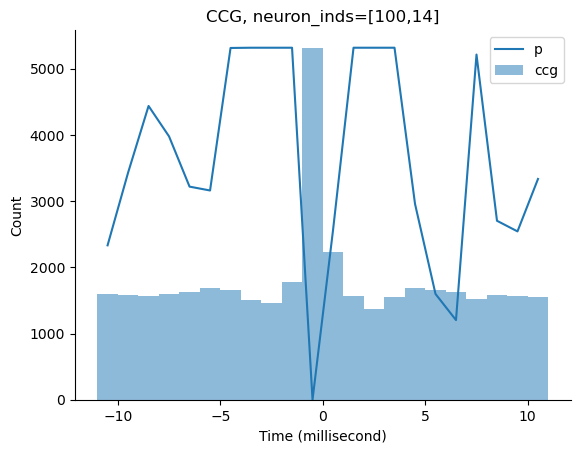

In [ ]:
plot_ccg(ccgs, pvals, window_size, bin_size, [100,14], mode='even')
print(ccgs[100,14].sum(),ccgs[100,14])

34322 [1562 1631 1558 1560 1638 1691 1593 1459 1392 1871 2412 1871 1392 1459
 1593 1691 1638 1560 1558 1631 1562]


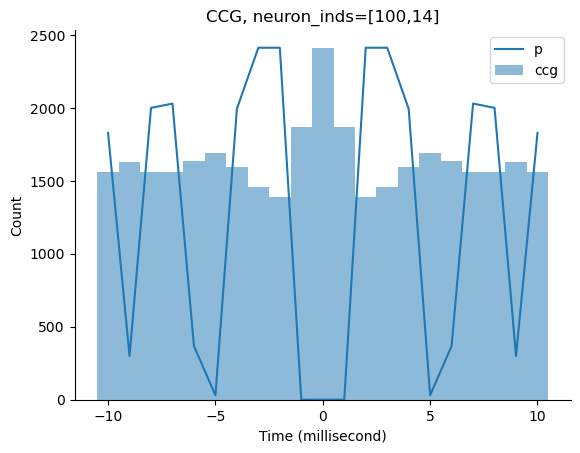

In [ ]:
plot_ccg(ccgs, pvals, window_size, bin_size, [100,14], mode='odd')
# plot_ccg(ccgs, pvals, [94,229], mode='odd')
print(ccgs[100,14].sum(),ccgs[100,14])

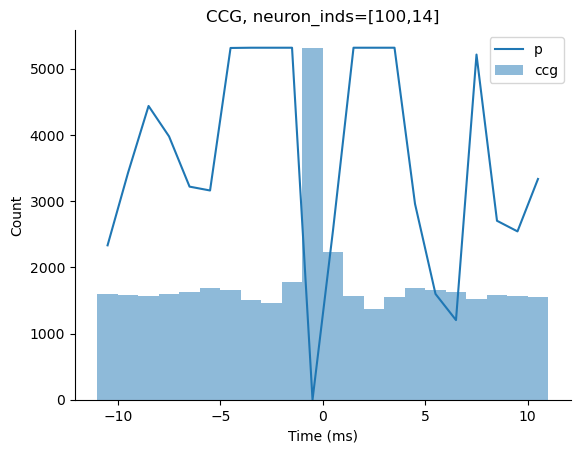

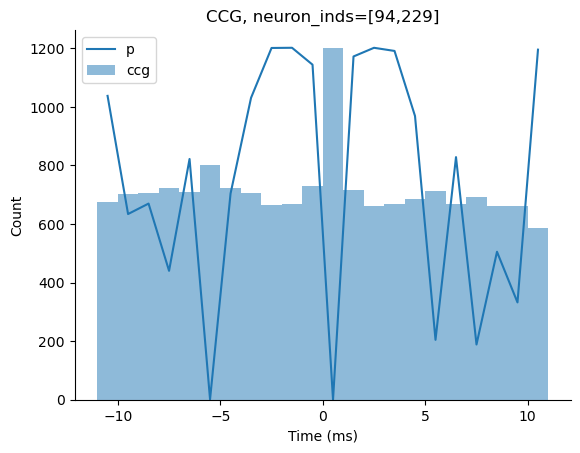

In [ ]:
plot_ccg(ccgs, pvals, window_size, bin_size, coords[locs[25]])
# plot_ccg(ccgs, coords[locs[23]])

In [ ]:
# test equivalence of ccgs. 
# Use a very small bin size. 
# when bin size approaches the finest possible scale, ccgsE===ccgsO
# when bin size is large, ccgsE can be slightly larger due to extra time from the two edge bins
bin_size=1
window_size=10
window_width=1 # long window length doesn't work? pred and ccg shape incompatible
ind=(0,1)
pvalsE, ccgsE, predE, qvalsE=msconn.pairwise_conn_fast(neurons,
    neuron_inds=[100,14],
    bin_size=bin_size,
    duration=window_size,
    window_width=window_width,
    wintype="gauss", 
    hollow_frac=None,
    alpha=0.05,
    use_multi_correction=True,
    use_cupy=True,
    symmetrize_mode='even',
)
print(ccgsE[ind].sum(),ccgsE[ind])

pvalsO, ccgsO, predO, qvalsO=msconn.pairwise_conn_fast(neurons,
    neuron_inds=[100,14],
    bin_size=bin_size,
    duration=window_size,
    window_width=window_width,
    wintype="gauss", 
    hollow_frac=None,
    alpha=0.05,
    use_multi_correction=True,
    use_cupy=True,
    symmetrize_mode='odd',
)
print(ccgsO[ind].sum(),ccgsO[ind])

23464 [1652 1683 1553 1373 1563 2598 4946 1771 1463 1510 1665 1687]
21780 [1691 1593 1459 1392 1871 1578 3919 1875 1716 1405 1573 1708]


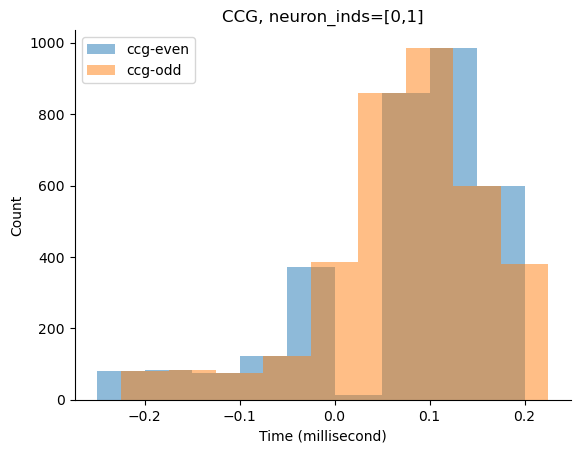

In [199]:
# example result - submillisecond synchrony
ind=(0,1)
C = int(window_size/bin_size//2)
scope = 4
_, ax = plt.subplots()
# generating even-numbered bins
even_bins = np.arange(-window_size / 2-bin_size, window_size / 2+bin_size/2, bin_size)+bin_size/2
odd_bins = np.arange(-window_size / 2, window_size / 2+bin_size, bin_size)
ax.bar(even_bins[C-scope:C+scope+1], ccgsE[ind][C-scope:C+scope+1], width=bin_size,alpha=0.5,label="ccg-even") # 373 13
ax.bar(odd_bins[C-scope:C+scope+1], ccgsO[ind][C-scope:C+scope+1], width=bin_size,alpha=0.5,label="ccg-odd") # 26
# ax.bar(bins, pred[x,y], width=bin_size,alpha=0.5,label='ccg-smooth')
# ax.plot(bins, pvals[x,y]*np.max(ccgs[x,y]), label='p')
ax.set_xlabel("Time (millisecond)")
ax.set_ylabel("Count")
ax.set_title(f"CCG, neuron_inds=[{ind[0]},{ind[1]}]")
ax.legend()
sns.despine(ax=ax)

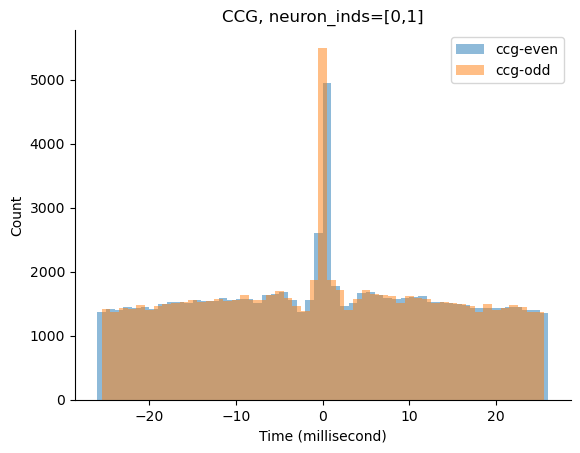

In [ ]:
# example result - submillisecond synchrony
ind=(0,1) # 100,14
C = int(window_size/bin_size//2)
scope = 4
_, ax = plt.subplots()
# generating even-numbered bins
even_bins = np.arange(-window_size / 2-bin_size, window_size / 2+bin_size/2, bin_size)+bin_size/2
odd_bins = np.arange(-window_size / 2, window_size / 2+bin_size, bin_size)
ax.bar(even_bins, ccgsE[ind], width=bin_size,alpha=0.5,label="ccg-even") # 373 13
ax.bar(odd_bins, ccgsO[ind], width=bin_size,alpha=0.5,label="ccg-odd") # 26
# ax.bar(bins, pred[x,y], width=bin_size,alpha=0.5,label='ccg-smooth')
# ax.plot(bins, pvals[x,y]*np.max(ccgs[x,y]), label='p')
ax.set_xlabel("Time (millisecond)")
ax.set_ylabel("Count")
ax.set_title(f"CCG, neuron_inds=[{ind[0]},{ind[1]}]")
ax.legend()
sns.despine(ax=ax)

#### Get short testing neurons

In [ ]:
neurons=subjects.nsd.allsess[5].neurons
short_neurons = neurons.time_slice(t_start=10000,t_stop=10550)

In [593]:
indices = np.argsort([neurons.spiketrains[_].shape[0] for _ in range(neurons.n_neurons)])
neurons.spiketrains[indices[0]].shape[0], neurons.spiketrains[indices[-1]].shape[0]
indices

array([139, 267, 133,  33, 137,  69, 114, 124,  26, 218, 130, 211, 142,
       271,  13,  28, 226, 270, 140, 105,  63, 120, 217, 196, 206,  29,
        94, 282, 210, 126, 157, 152, 132, 237,  10, 258,  62, 172, 153,
       214, 111,  46, 190, 241, 230, 212, 104, 220,  71,  55, 110, 222,
       100, 244,  56, 191,  99,  49,  67,  92,  74, 251, 192, 245, 223,
       164, 205, 185, 168,  32, 116, 268, 278, 240, 234,   7,  53, 233,
        60, 161, 274, 225,  83, 250,  89, 264,  90, 167, 254,  36, 252,
       170, 138, 131, 201, 246, 194,   9, 144, 203, 134,  85, 239, 261,
         4, 221, 269, 198,  34, 179, 155, 232,  17, 156, 207, 102,  95,
        43, 199, 224, 166, 112,  96,  68, 154,  31, 231, 213,  59, 281,
       273, 259, 189, 285, 255,  51, 253,  42,  18, 256,  66, 135, 272,
       243, 208,  11,  61, 276,  38,  87, 265, 242, 160, 159,  15, 287,
       151, 180, 283, 280,  41, 107,  30, 235, 216,  65, 147,  44, 275,
       129,  80, 119, 174,  78,  24,  86, 195,  19, 262, 108, 14

In [594]:
indices[-110:-107]

array([262, 108, 149])

In [ ]:
correlations.cp_spike_correlations_2groups(neurons=short_neurons,
                                           ref_neuron_inds=indices[10:20],
            neuron_inds=indices[-110:-107],
            bin_size=1*1e-3,
            window_size=20*1e-3,
            symmetrize_mode='odd'
).shape

# 5 bins in 5ms window
# 30 samples per 1ms bin
# only ran two steps (shift=1,2) before stop
# neuron0=30, neuron1=216, neuron2=235

<class 'numpy.ndarray'>
[130 211 142 271  13  28 226 270 140 105 262 108 149]
shift 6


(10, 3, 20)

In [ ]:
timing,count=np.unique(spks,return_counts=True)
max(count)

In [59]:
allspks=np.concatenate(neurons.spiketrains)
timing,count=np.unique(allspks,return_counts=True)

In [60]:
allspks[np.argmax(count)]

32759.258066666665

In [32]:
spks=np.concatenate(short_neurons.spiketrains)
spks.sort()

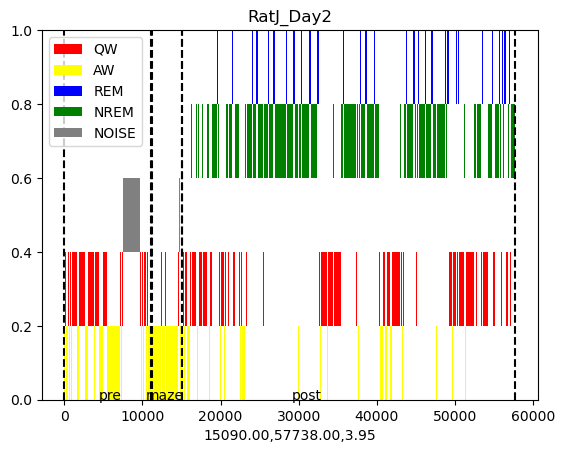

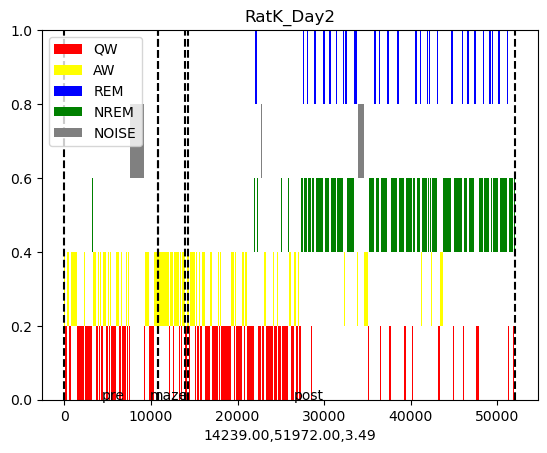

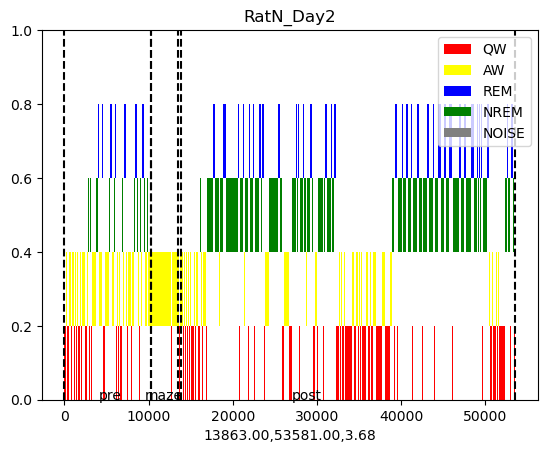

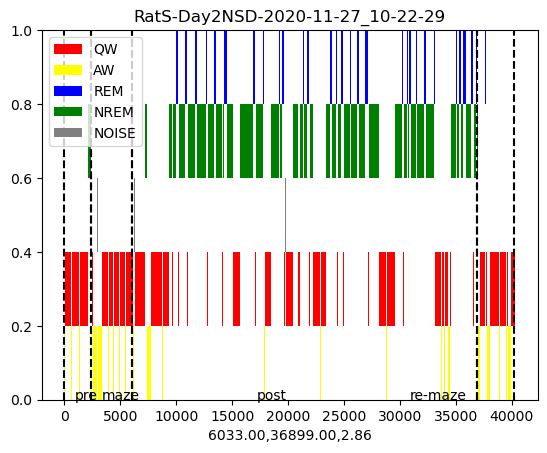

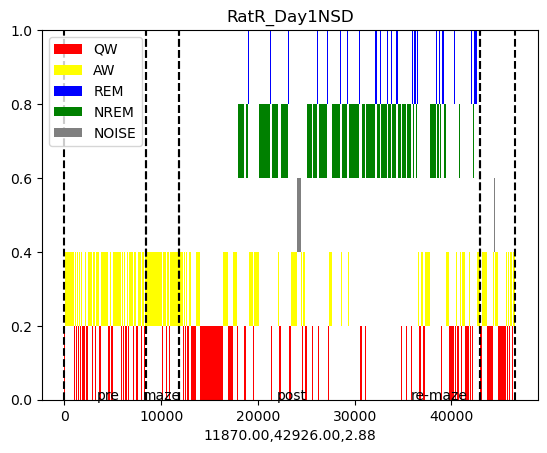

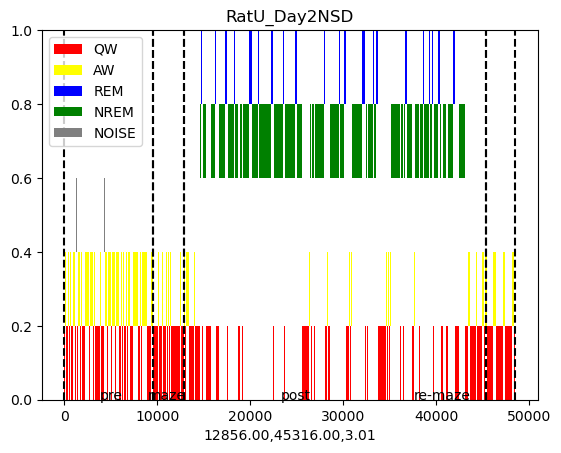

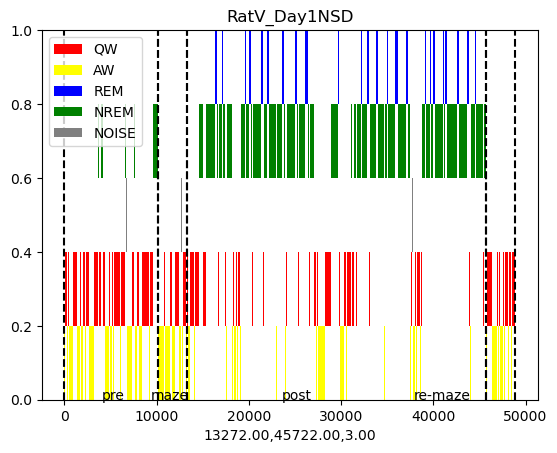

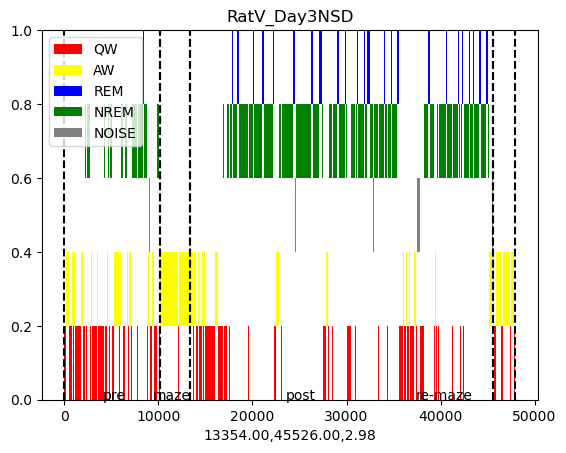

In [496]:
from neuropy.plotting import epochs
for sess in subjects.nsd.allsess:
    print()
    ax=epochs.plot_epochs(sess.brainstates,colors={
        'QW':'red','AW':'yellow','REM':'blue','NREM':'green','NOISE':'gray'
    })
    p = sess.paradigm
    for i in range(len(p.labels)):
        start,stop = p.starts[i],p.stops[i]
        ax.axvline(x=start,color="black", linestyle="--")
        ax.axvline(x=stop,color="black", linestyle="--")
        ax.text((start+stop)*0.4,0,p.labels[i])
        ax.set_title(msconn._short_session_name(sess))
        start,stop = p.starts[2],p.stops[2]
        ax.set_xlabel(f"{start:.2f},{stop:.2f},{(stop-start)/60/60/3:.2f}")

In [451]:
print(subjects.nsd.allsess[5].paradigm)

4 epochs
Snippet: 
    start   stop    label
0      0   9544      pre
1   9545  12855     maze
2  12856  45316     post
3  45317  48496  re-maze


In [445]:
subjects.nsd.allsess[5].brainstates.n_epochs

636

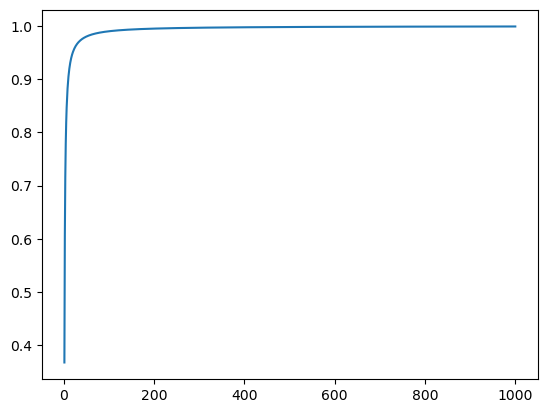

In [39]:
x=np.arange(1000)+1
y=np.exp(-1/x)
plt.plot(x,y)

#### minimum ISI

In [ ]:
np.min([np.diff(np.unique(i)).min()*1000 for i in neurons.get_neuron_type('pyr').spiketrains])

0.06666666740784422

In [ ]:
interspikes = np.concatenate([np.diff(i)*1000 for i in neurons.get_neuron_type('mua').spiketrains])
hist = np.histogram(interspikes[interspikes<2],bins=50)

In [78]:
hist

(array([   66,   267,   359,   262,   457,   489,   329,   351,   338,
          404,   337,   208,   955, 37883, 66415, 48594, 36988, 35936,
        35232, 49684, 47194, 31571, 29673, 30536, 38949, 51389, 30790,
        29921, 31539, 50645, 44393, 32146, 31756, 31946, 42246, 54684,
        31680, 33245, 31164, 51792, 44582, 31662, 31669, 32137, 43569,
        54406, 33575, 32388, 33606, 41115]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]))

In [41]:
interspikes = [np.sum(np.diff(i)<1e-4)==0 for i in neurons.get_neuron_type('pyr').spiketrains]
hist = np.histogram(interspikes,bins=10)

/tmp/ipykernel_3519858/3276031069.py:2: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist = np.histogram(interspikes,bins=10)


In [42]:
hist

(array([  6,   0,   0,   0,   0,   0,   0,   0,   0, 145]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

#### conv test

In [99]:
ccg=ccg_jitters[0][0]

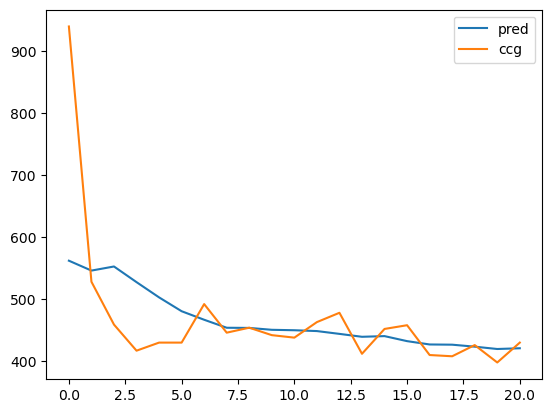

In [ ]:
plt.plot(pred,label="pred")
plt.plot(ccg,label="ccg")
plt.legend()